In [106]:
# importing the libraries that we are going to use in this project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [107]:
# creating a dataframe to store the data

df = pd.read_csv(r"C:\Users\Mahpeyker\Desktop\car_prices.csv", error_bad_lines=False, warn_bad_lines=False)

C:\Users\Mahpeyker\AppData\Local\Temp\ipykernel_15252\2419771915.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r"C:\Users\Mahpeyker\Desktop\car_prices.csv", error_bad_lines=False, warn_bad_lines=False)
C:\Users\Mahpeyker\AppData\Local\Temp\ipykernel_15252\2419771915.py:3: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(r"C:\Users\Mahpeyker\Desktop\car_prices.csv", error_bad_lines=False, warn_bad_lines=False)


In [108]:
# exploring the data

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [109]:
# deleting columns that are not related to this project to reduce runtime

drop_column = ['trim', 'seller']

df.drop(drop_column, inplace=True, axis=1)


In [110]:
# setting the column 'vin' as the unique identifier for the dataframe


df.set_index('vin', inplace=True)

In [111]:
df.head()

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
vin,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,black,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
5xyktca69fg561319,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,beige,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
wba3c1c51ek116351,2014,BMW,3 Series,Sedan,automatic,ca,4.5,1331.0,gray,black,31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
yv1612tb4f1310987,2015,Volvo,S60,Sedan,automatic,ca,4.1,14282.0,white,black,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
wba6b2c57ed129731,2014,BMW,6 Series Gran Coupe,Sedan,automatic,ca,4.3,2641.0,gray,black,66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [112]:
# accessing the first row through the unique identifier

df.loc['5xyktca69fg566472']

year                                               2015
make                                                Kia
model                                           Sorento
body                                                SUV
transmission                                  automatic
state                                                ca
condition                                           5.0
odometer                                        16639.0
color                                             white
interior                                          black
mmr                                               20500
sellingprice                                      21500
saledate        Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
Name: 5xyktca69fg566472, dtype: object

In [113]:
# another way to access rows through unique identifier

df.iloc[2]

year                                               2014
make                                                BMW
model                                          3 Series
body                                              Sedan
transmission                                  automatic
state                                                ca
condition                                           4.5
odometer                                         1331.0
color                                              gray
interior                                          black
mmr                                               31900
sellingprice                                      30000
saledate        Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
Name: wba3c1c51ek116351, dtype: object

In [114]:
# checking if the dataframe contain null values


df.isnull()

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
vin,,,,,,,,,,,,,
5xyktca69fg566472,False,False,False,False,False,False,False,False,False,False,False,False,False
5xyktca69fg561319,False,False,False,False,False,False,False,False,False,False,False,False,False
wba3c1c51ek116351,False,False,False,False,False,False,False,False,False,False,False,False,False
yv1612tb4f1310987,False,False,False,False,False,False,False,False,False,False,False,False,False
wba6b2c57ed129731,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
knalw4d4xf6019304,False,False,False,False,True,False,False,False,False,False,False,False,False
3c6td5et6cg112407,False,False,False,False,False,False,False,False,False,False,False,False,False
5uxzw0c58cl668465,False,False,False,False,False,False,False,False,False,False,False,False,False


In [115]:
# deleting the rows with complete null values

df.dropna()

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
vin,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,black,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
5xyktca69fg561319,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,beige,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
wba3c1c51ek116351,2014,BMW,3 Series,Sedan,automatic,ca,4.5,1331.0,gray,black,31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
yv1612tb4f1310987,2015,Volvo,S60,Sedan,automatic,ca,4.1,14282.0,white,black,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
wba6b2c57ed129731,2014,BMW,6 Series Gran Coupe,Sedan,automatic,ca,4.3,2641.0,gray,black,66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
wbafr1c53bc744672,2011,BMW,5 Series,Sedan,automatic,fl,3.9,66403.0,white,brown,20300,22800,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
3c6td5et6cg112407,2012,Ram,2500,Crew Cab,automatic,wa,5.0,54393.0,white,black,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
5uxzw0c58cl668465,2012,BMW,X5,SUV,automatic,ca,4.8,50561.0,black,black,29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)


In [116]:
# checking if there is duplicate values

df.duplicated()

vin
5xyktca69fg566472    False
5xyktca69fg561319    False
wba3c1c51ek116351    False
yv1612tb4f1310987    False
wba6b2c57ed129731    False
                     ...  
knalw4d4xf6019304    False
3c6td5et6cg112407    False
5uxzw0c58cl668465    False
1n4al3ap0fc216050    False
1ftfw1et2eke87277    False
Length: 558811, dtype: bool

In [117]:
# datatypes of every column in the dataframe

df.dtypes

year              int64
make             object
model            object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [118]:
# changing data type of the 'saledate' column from object to datetime format

df['saledate'] = pd.to_datetime(df['saledate'], infer_datetime_format=True, utc=True)

In [119]:
df.dtypes

year                          int64
make                         object
model                        object
body                         object
transmission                 object
state                        object
condition                   float64
odometer                    float64
color                        object
interior                     object
mmr                           int64
sellingprice                  int64
saledate        datetime64[ns, UTC]
dtype: object

In [120]:
# renaming the column 'sellingprice' to 'price'

df.rename(columns = {'sellingprice':'price'}, inplace = True)

<Axes: >

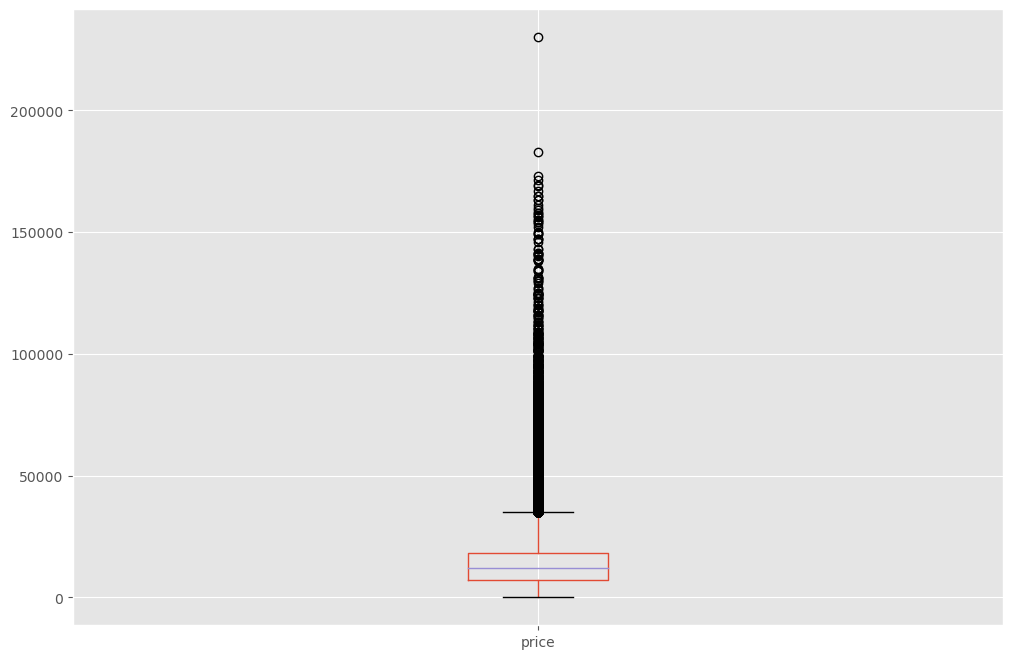

In [121]:
# checking if there is outliers in the 'price' column

df.boxplot(column=['price'])

In [122]:
# sorting the dataframe by the 'price' column descendingly

df.sort_values(by=['price'], inplace=False, ascending=False)

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,price,saledate
vin,,,,,,,,,,,,,
1fmcu9j98eua23833,2014,Ford,Escape,SUV,automatic,mo,4.3,27802.0,green,tan,22800,230000,2015-02-24 18:00:00+00:00
zff67nfa1b0178698,2011,Ferrari,458 Italia,coupe,automatic,fl,4.6,12116.0,red,black,182000,183000,2015-06-16 20:40:00+00:00
wddug7kb2fa102347,2015,Mercedes-Benz,S-Class,Sedan,automatic,ca,4.1,5277.0,white,white,170000,173000,2015-05-20 22:00:00+00:00
sca664s52dux52152,2013,Rolls-Royce,Ghost,sedan,automatic,fl,4.2,7852.0,white,beige,178000,171500,2015-06-16 20:05:00+00:00
sca664s58cux50727,2012,Rolls-Royce,Ghost,Sedan,automatic,fl,4.5,14316.0,black,beige,154000,169500,2015-01-13 17:40:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1g1ne52j83m720145,2003,Chevrolet,Malibu,Sedan,automatic,nj,1.0,186893.0,red,beige,950,100,2015-01-20 20:00:00+00:00
4s2cm58v9s4375559,1995,Isuzu,Rodeo,SUV,NaN,va,1.0,254132.0,red,gray,375,1,2015-03-03 17:05:00+00:00
1ftsw31f52ed16477,2002,Ford,F-350 Super Duty,Crew Cab,NaN,ca,2.0,NaN,white,gray,7850,1,2015-02-04 20:00:00+00:00


In [123]:
# finding the most profitable car colors

most_profit_color = df.groupby('color', dropna=True)[['price']].sum()


sort_most_profit_color = most_profit_color.sort_values('price', ascending = False).nlargest(6, 'price')


print(sort_most_profit_color)

             price
color             
black   1721030148
white   1572418616
gray    1155960734
silver   982393702
blue     585061375
red      552843207


<Axes: title={'center': 'Most profitable car colors'}, xlabel='color', ylabel='price'>

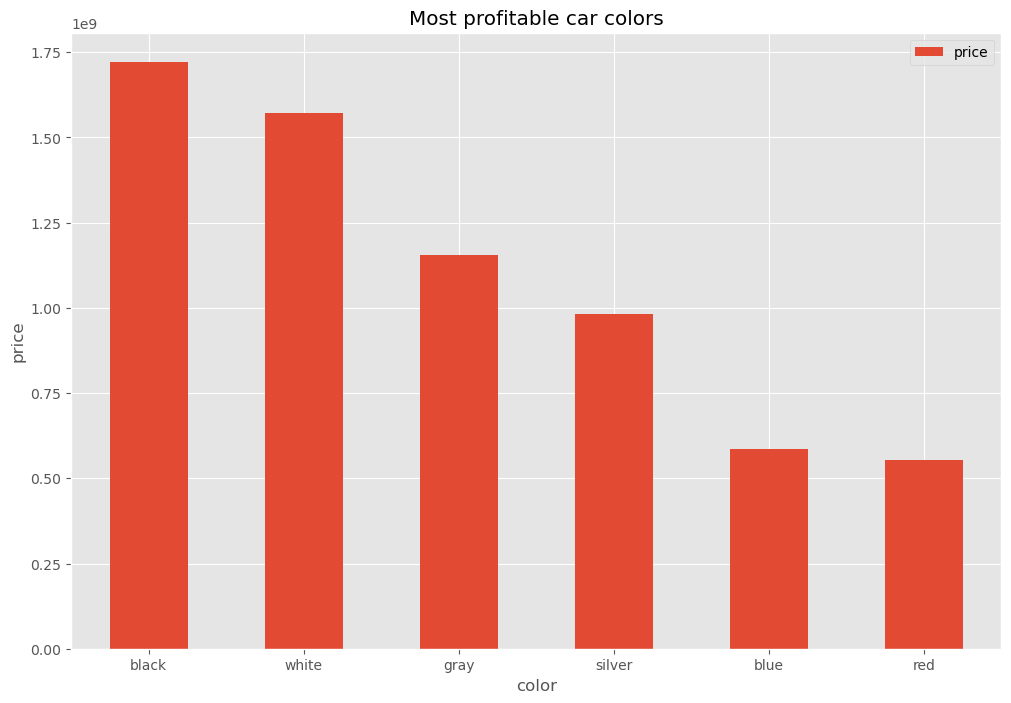

In [124]:
sort_most_profit_color.plot(kind='bar', title='Most profitable car colors',rot=0,xlabel='color', ylabel='price')

<Axes: title={'center': 'Correlation between odometer and price'}, xlabel='price', ylabel='odometer'>

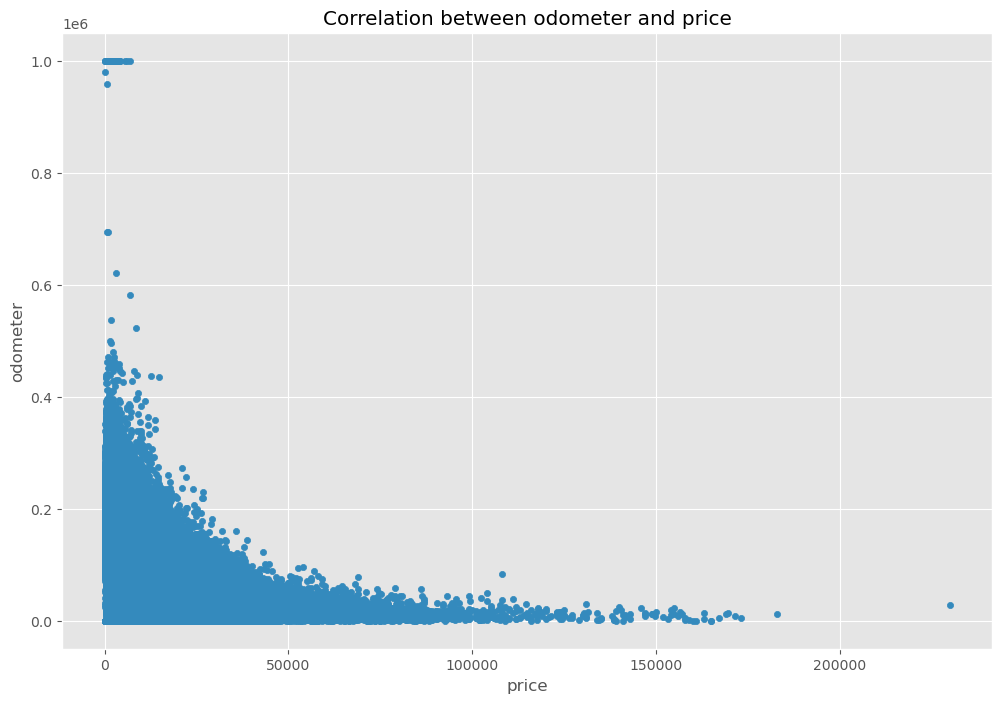

In [125]:
# plotting the correlation between odometer of the car and the price in a scatterplot

df.plot.scatter(x="price", y="odometer", title="Correlation between odometer and price")

In [126]:
# Correlation matrix between all numeric columns

df.corr(method ='pearson', numeric_only = True)


,year,condition,odometer,mmr,price
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
price,0.586488,0.538788,-0.582405,0.983634,1.000000


Text(120.72222222222221, 0.5, 'Car prices')

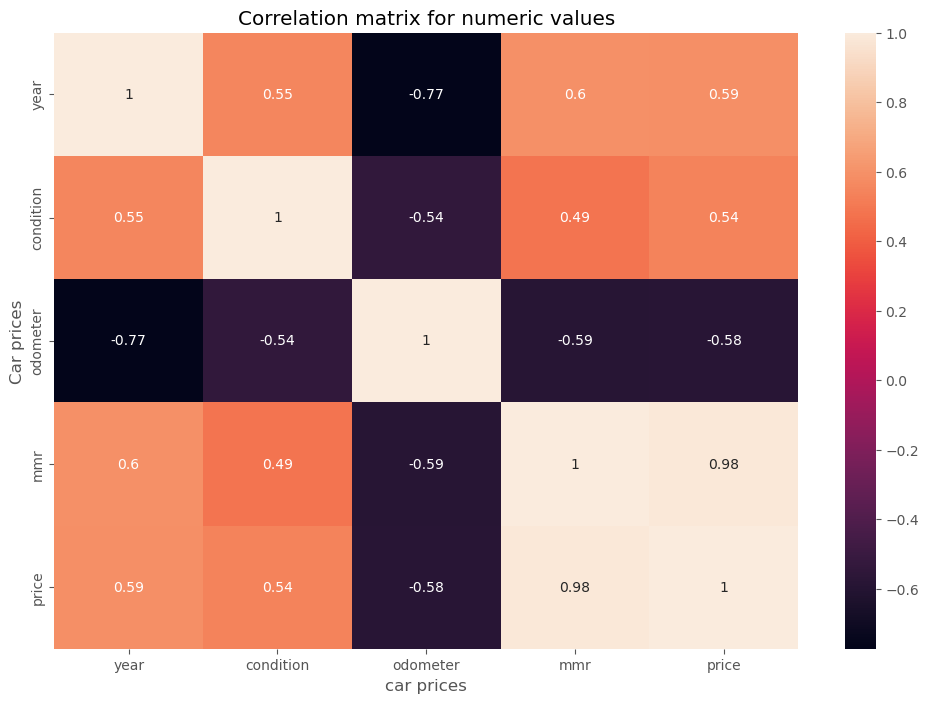

In [127]:
# Heatmap to show the correlation betweeen all the numeric columns in the dataframe


correlation_matrix = df.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for numeric values")

plt.xlabel("car prices")

plt.ylabel("Car prices")


In [128]:
# converting the categorical columns into numeric columns 

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,price,saledate
year,1.000000,0.125532,0.273983,-0.048460,0.050727,0.021163,0.076475,0.181329,0.123715,0.225701,0.636042,0.252394,0.000836
make,0.125532,1.000000,0.428099,0.029091,0.049658,0.011527,0.017189,0.002954,0.019642,0.041048,0.102527,0.052879,-0.011874
model,0.273983,0.428099,1.000000,0.058789,0.041390,0.030175,-0.003558,0.043845,0.040277,0.077711,0.225473,0.153827,0.004161
body,-0.048460,0.029091,0.058789,1.000000,-0.015305,0.024590,0.020022,0.122504,-0.031335,0.023513,-0.039795,0.003311,0.436271
transmission,0.050727,0.049658,0.041390,-0.015305,1.000000,0.033536,0.022627,0.012019,0.028883,0.009400,0.046786,0.008842,0.021469
state,0.021163,0.011527,0.030175,0.024590,0.033536,1.000000,-0.006031,0.029062,0.006453,0.021827,0.042860,0.037544,0.134603
condition,0.076475,0.017189,-0.003558,0.020022,0.022627,-0.006031,1.000000,0.081025,0.000334,0.004928,0.050558,-0.051696,0.041517
odometer,0.181329,0.002954,0.043845,0.122504,0.012019,0.029062,0.081025,1.000000,0.017463,0.048773,0.153525,0.058875,0.213866
color,0.123715,0.019642,0.040277,-0.031335,0.028883,0.006453,0.000334,0.017463,1.000000,0.010846,0.087492,0.039365,-0.001730
interior,0.225701,0.041048,0.077711,0.023513,0.009400,0.021827,0.004928,0.048773,0.010846,1.000000,0.169216,0.071711,0.004212


Text(120.72222222222221, 0.5, 'Car prices')

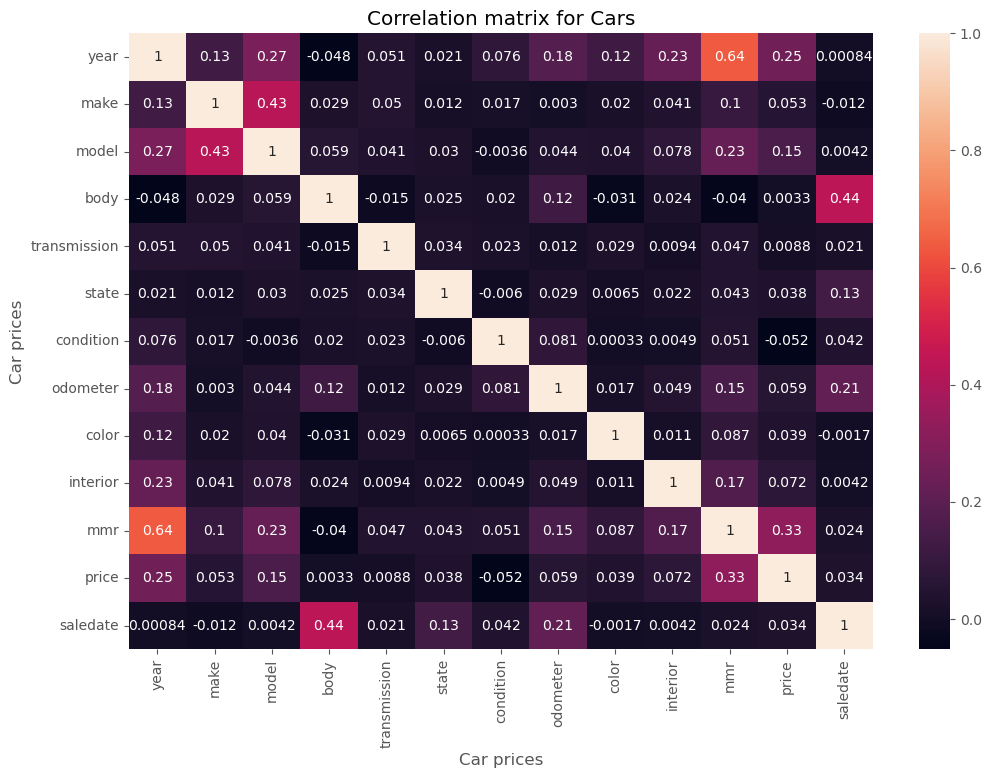

In [129]:
# Heatmap to show the correlation between all columns in the dataframe after converting the categorical into numeric columns


correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Cars")

plt.xlabel("Car prices")

plt.ylabel("Car prices")


In [130]:
# correlation between each column and all the other columns

corr = df.apply(lambda x: x.factorize()[0]).corr()

pairs = corr.unstack()

print(pairs)

year      year            1.000000
          make            0.125532
          model           0.273983
          body           -0.048460
          transmission    0.050727
                            ...   
saledate  color          -0.001730
          interior        0.004212
          mmr             0.024387
          price           0.034036
          saledate        1.000000
Length: 169, dtype: float64


In [131]:
# sort the correlation values

sorted = pairs.sort_values(kind="quicksort")

print(sorted)

condition  price       -0.051696
price      condition   -0.051696
year       body        -0.048460
body       year        -0.048460
mmr        body        -0.039795
                          ...   
body       body         1.000000
model      model        1.000000
make       make         1.000000
price      price        1.000000
saledate   saledate     1.000000
Length: 169, dtype: float64


In [132]:
# showing the high correlation pairs

high_corr = sorted[abs(sorted) > 0.5]

print(high_corr)

year          mmr             0.636042
mmr           year            0.636042
year          year            1.000000
condition     condition       1.000000
mmr           mmr             1.000000
interior      interior        1.000000
color         color           1.000000
odometer      odometer        1.000000
state         state           1.000000
transmission  transmission    1.000000
body          body            1.000000
model         model           1.000000
make          make            1.000000
price         price           1.000000
saledate      saledate        1.000000
dtype: float64
